# Loan Prediction using Machine Learning

### Step 2:  we will predict whether a customer will get the loan from bank or not.

Following Factors are:
1. Gender
2. Education
3. Marriage status
4. Loand Amount
5. Credit History
6. Account Balance
7. Property Area
8. Credit History
9. Dependants
10. Self Employment Status

There are more factors also, let see in this notebook

#### Dataset : https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

Problem Statement of Dataset:

The Dream Housing Finance company, operating in urban, semi-urban, and rural areas, offers a variety of home loans. When customers apply for a home loan, the company assesses their eligibility. They seek to automate this process in real-time using customer details provided in the online application form, including Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To achieve this automation, they aim to identify segments of customers eligible for specific loan amounts, enabling targeted marketing efforts. They've provided a partial dataset to facilitate this task.




## Import Libraries

In [265]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [266]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [267]:
pip install SHAP

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Preprocessing

In [268]:
import pandas as pd
import numpy as np
import os
import matplotlib .pyplot as plt
import seaborn as sns 


In [269]:
## Pandas
## Numpy
## SKlearn
## Matplotlib

In [270]:
train=pd.read_csv('./Loan_Dataset/train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

## Check the missing Values in data

In [271]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing on the data

In [272]:
Loan_status=train.Loan_Status

In [273]:
Loan_status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [274]:
train.drop("Loan_Status", axis=1, inplace=True)


In [275]:
test = pd.read_csv('./Loan_Dataset/test.csv')

In [276]:
Loan_ID = test.Loan_ID 

In [277]:
Loan_ID

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [278]:
data = pd.concat([train, test], ignore_index=True)



In [279]:
data.shape

(981, 12)

In [280]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### checking Null Values

In [281]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [282]:
data.Dependents.dtypes

dtype('O')

In [283]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [284]:
numeric_data = data.select_dtypes(include='number')

In [285]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.0
977,4158,709.0,115.0,360.0,1.0
978,3250,1993.0,126.0,360.0,NaN
979,5000,2393.0,158.0,360.0,1.0


In [286]:
# Drop the 'Loan_ID' column
data= data.drop(columns=['Loan_ID'])


In [287]:
corrmat = numeric_data.corr()

## Label Encoding

In [288]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [289]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

Gender
1.0    775
0.0    182
Name: count, dtype: int64

In [290]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [291]:
data.Married.value_counts()

Married
1.0    631
0.0    347
Name: count, dtype: int64

In [292]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [293]:
data.Dependents.value_counts()

Dependents
0.0    545
1.0    160
2.0    160
3.0     91
Name: count, dtype: int64

In [294]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [295]:
data.Education.value_counts()

Education
1    763
0    218
Name: count, dtype: int64

In [296]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [297]:
data.Self_Employed.value_counts()

Self_Employed
0.0    807
1.0    119
Name: count, dtype: int64

In [298]:
data.Property_Area.value_counts()

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64

In [299]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [300]:
data.Property_Area.value_counts()

Property_Area
1    349
2    342
0    290
Name: count, dtype: int64

In [301]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [302]:
data.Credit_History.size

981

##  filling the missing values

In [303]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)
data.Married.fillna(np.random.randint(0,2),inplace=True)
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.Gender.fillna(np.random.randint(0,2),inplace=True)
data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_77428/1980179113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Credit_History.fillna(np.random.randint(0,2),inplace=True)
/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_77428/1980179113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [304]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Correlation Heatmap

<Axes: >

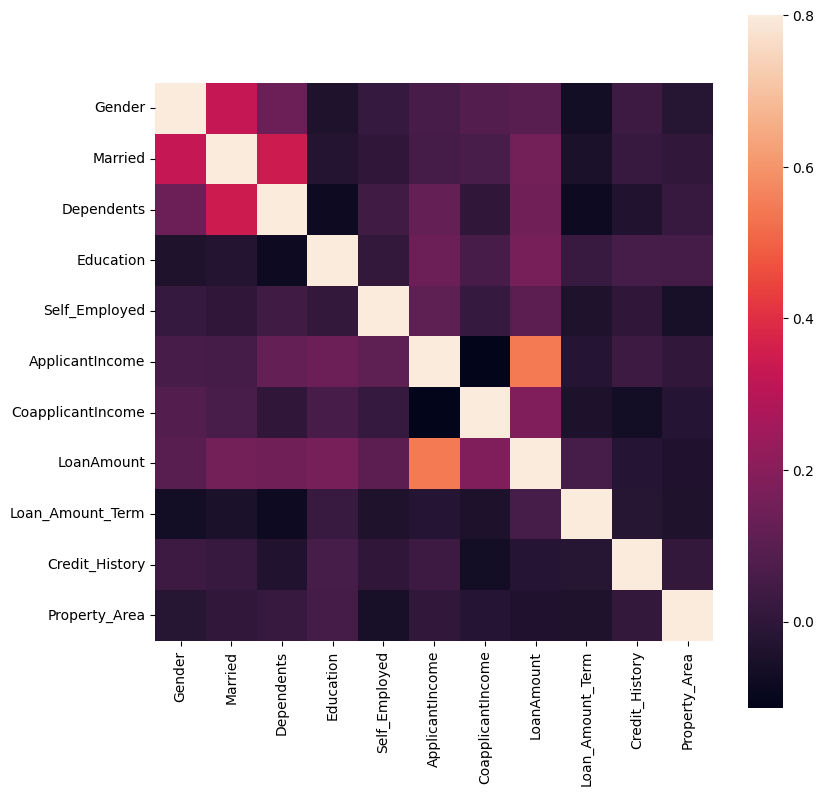

In [305]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

## Pairplot

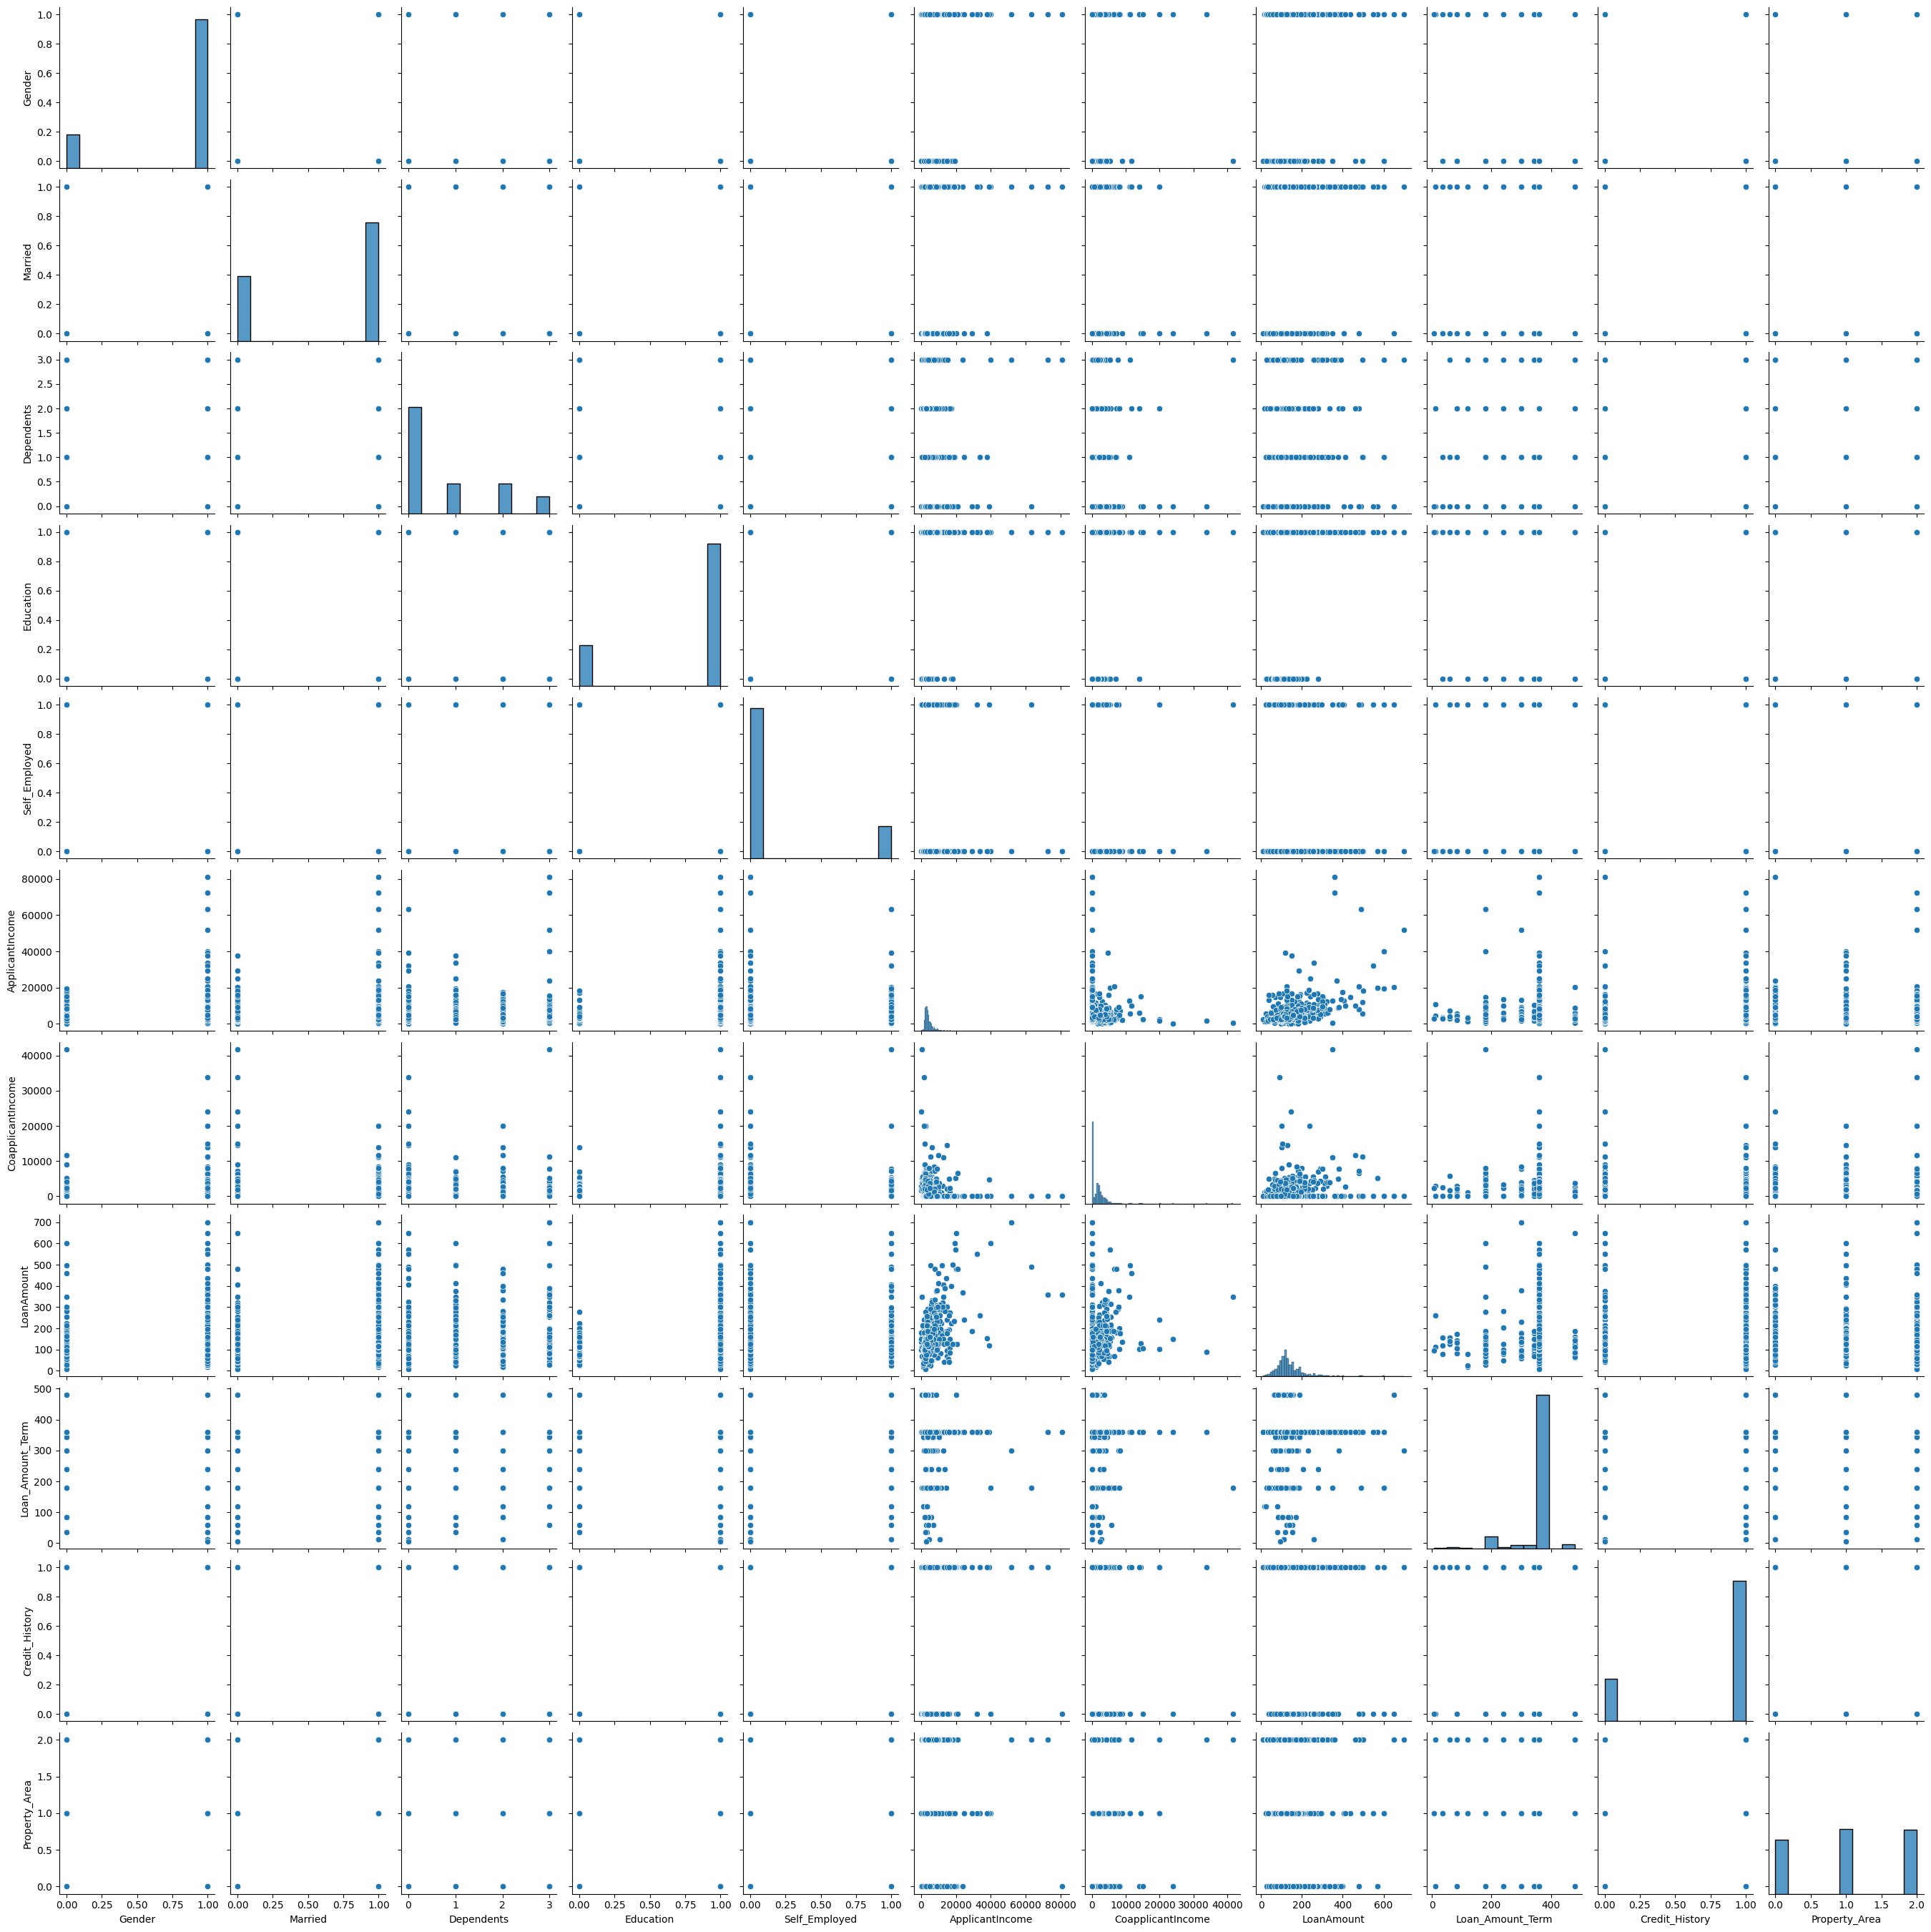

In [306]:
sns.pairplot(data)

## Multicollinearlity (Variance Inflation Factor)

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
# Assigning features to the 'features' column
vif['features'] = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].columns

# Calculating VIF for each feature
vif['VIF Factor'] = [variance_inflation_factor(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values, i) for i in range(data.shape[1])]

# Rounding VIF values
vif = vif.round(1)

# Sorting by VIF Factor
vif = vif.sort_values(by="VIF Factor", ascending=True)

# Printing the result
vif

,features,VIF Factor
4,Self_Employed,1.2
6,CoapplicantIncome,1.5
2,Dependents,1.8
10,Property_Area,2.6
5,ApplicantIncome,2.9
1,Married,3.6
9,Credit_History,4.1
3,Education,4.5
0,Gender,5.6
7,LoanAmount,7.2


In [308]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


## distribution of independent  numeric variables (QQ Plot)

<Figure size 800x500 with 0 Axes>

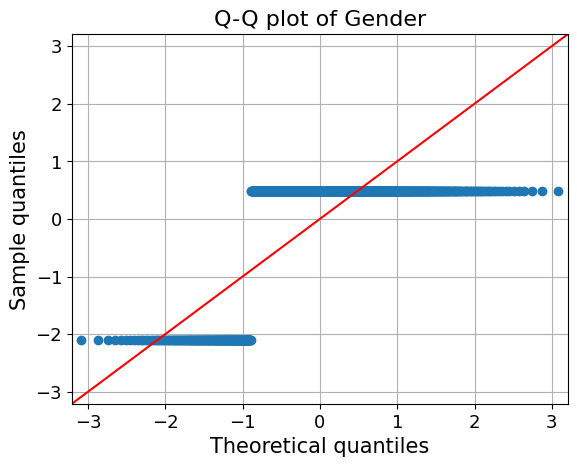

<Figure size 800x500 with 0 Axes>

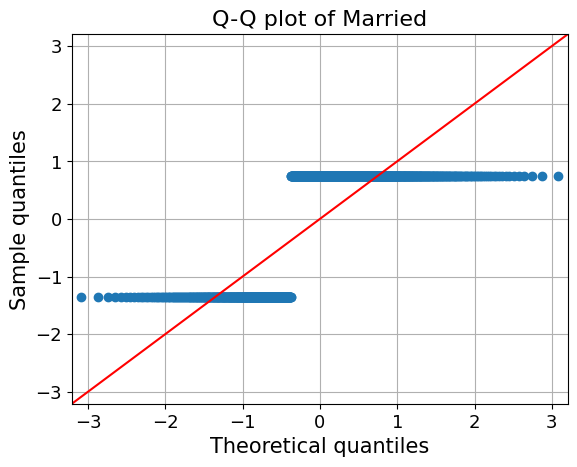

<Figure size 800x500 with 0 Axes>

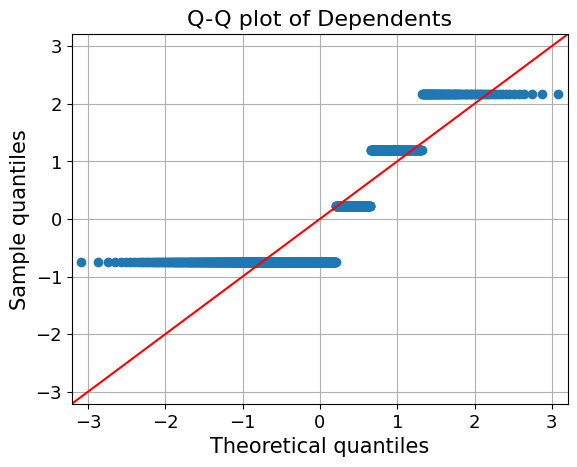

<Figure size 800x500 with 0 Axes>

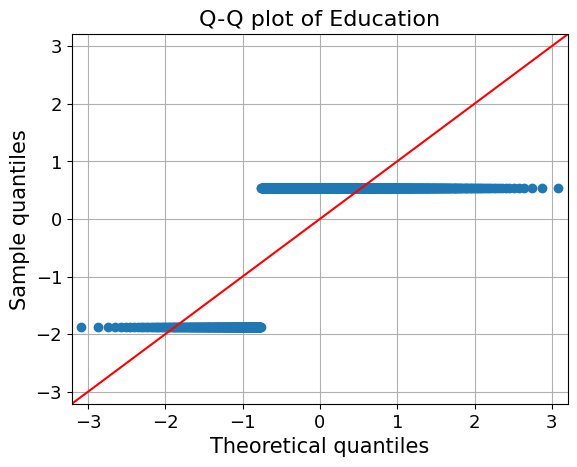

<Figure size 800x500 with 0 Axes>

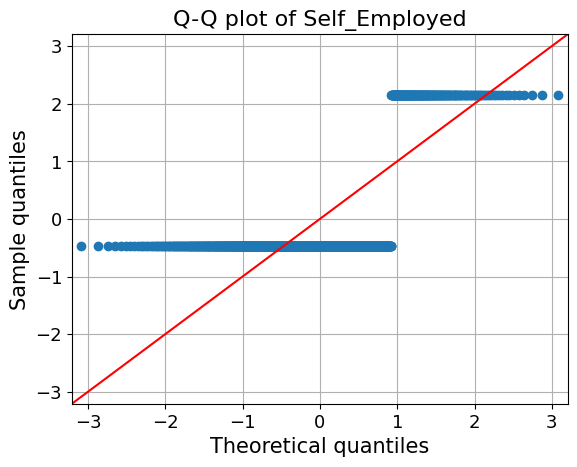

<Figure size 800x500 with 0 Axes>

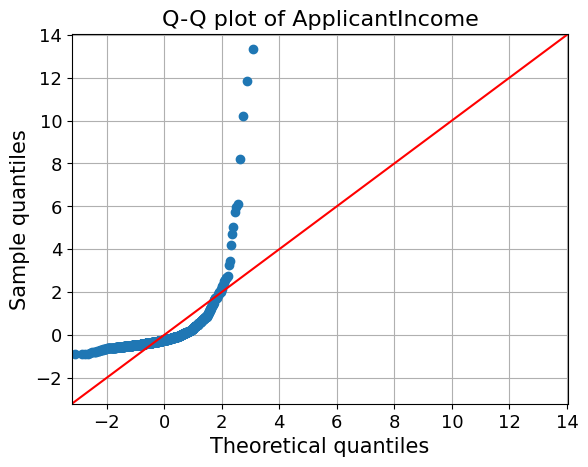

<Figure size 800x500 with 0 Axes>

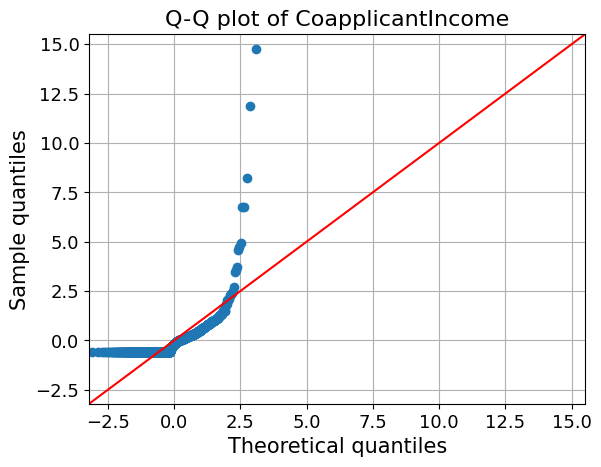

<Figure size 800x500 with 0 Axes>

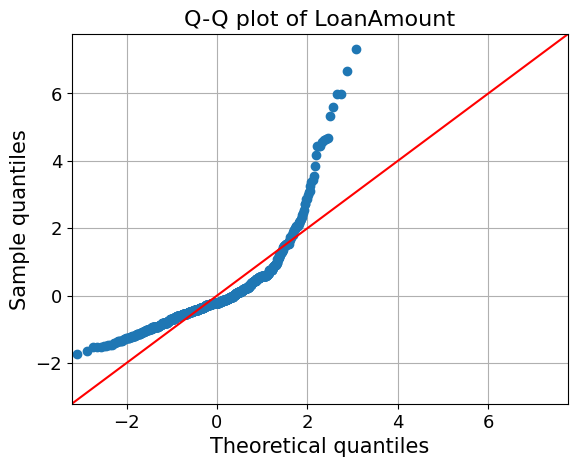

<Figure size 800x500 with 0 Axes>

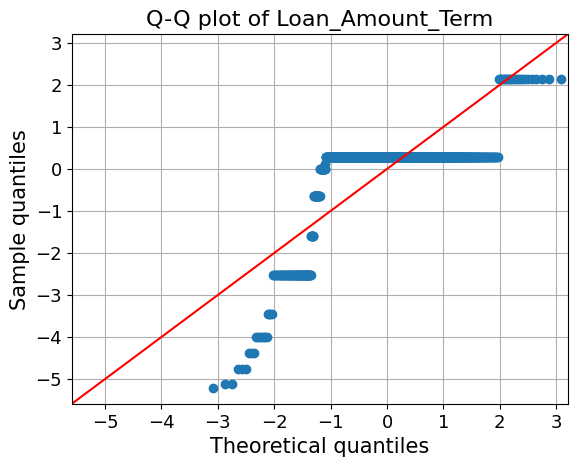

<Figure size 800x500 with 0 Axes>

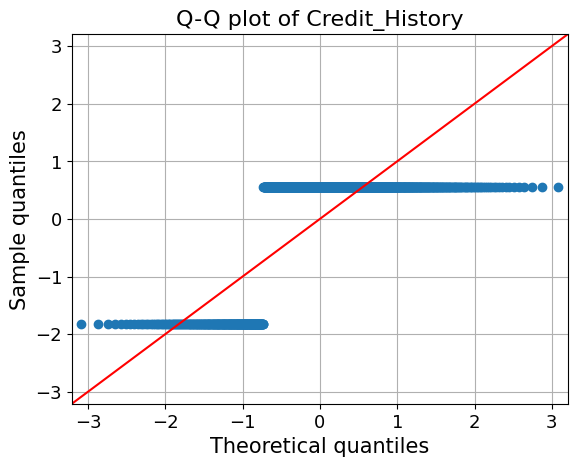

<Figure size 800x500 with 0 Axes>

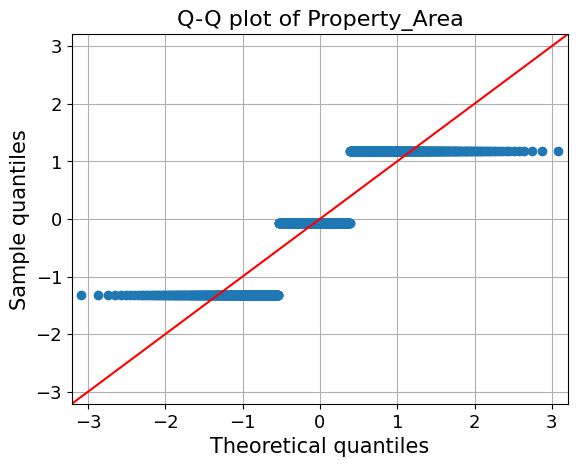

In [309]:
# checking the distribution of independent  numeric variables
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    ["Gender",
     "Married",
     "Dependents",
     "Education",
     "Self_Employed",
     "ApplicantIncome",
     "CoapplicantIncome",
     "LoanAmount",
     "Loan_Amount_Term",
     "Credit_History",
     "Property_Area"
     ]
]

# Iterate through columns and create Q-Q plots
for i in data_norm.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[i], line="45", fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(i), fontsize=16)
    plt.grid(True)
    plt.show()

Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution

## Ranges of the predictor variables

<Axes: >

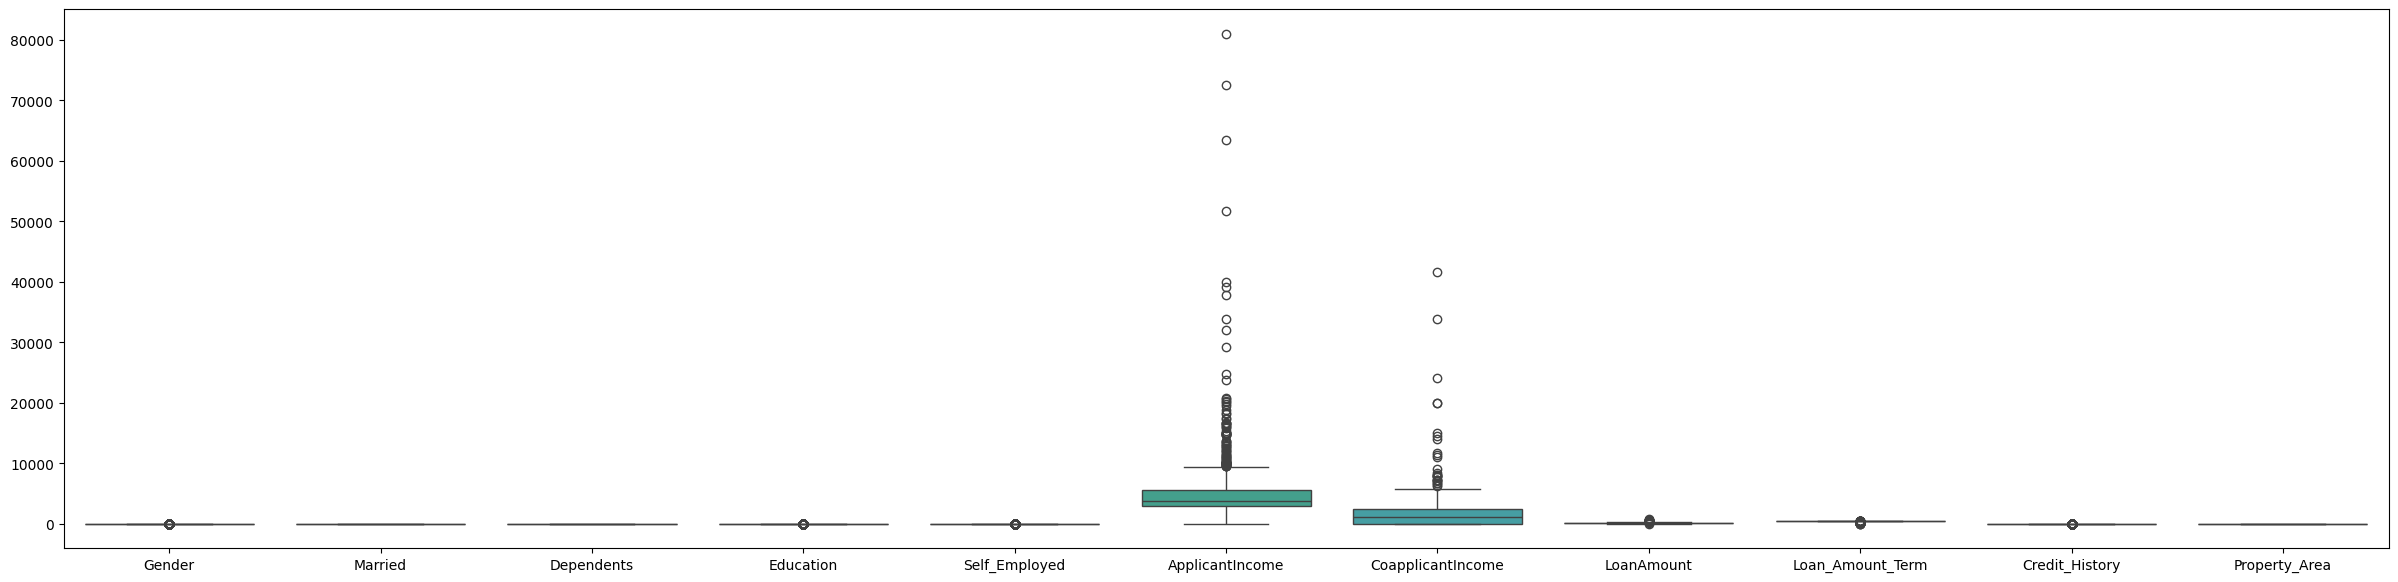

In [310]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(30, 7))
sns.boxplot(data)

## Outlier Treatment

In [311]:
def outlier_treatment(data):
    # Identify numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    # Loop through each numeric column
    for column in numeric_columns:
        # Calculate the z-score for each data point in the column
        z_scores = (data[column] - data[column].mean()) / data[column].std()

        # Define the threshold for outliers
        threshold = 3

        # Identify outlier indices
        outlier_indices = np.abs(z_scores) > threshold

        # Replace outlier values with the median
        data.loc[outlier_indices, column] = data[column].median()

    return data

data = outlier_treatment(data)

<Axes: >

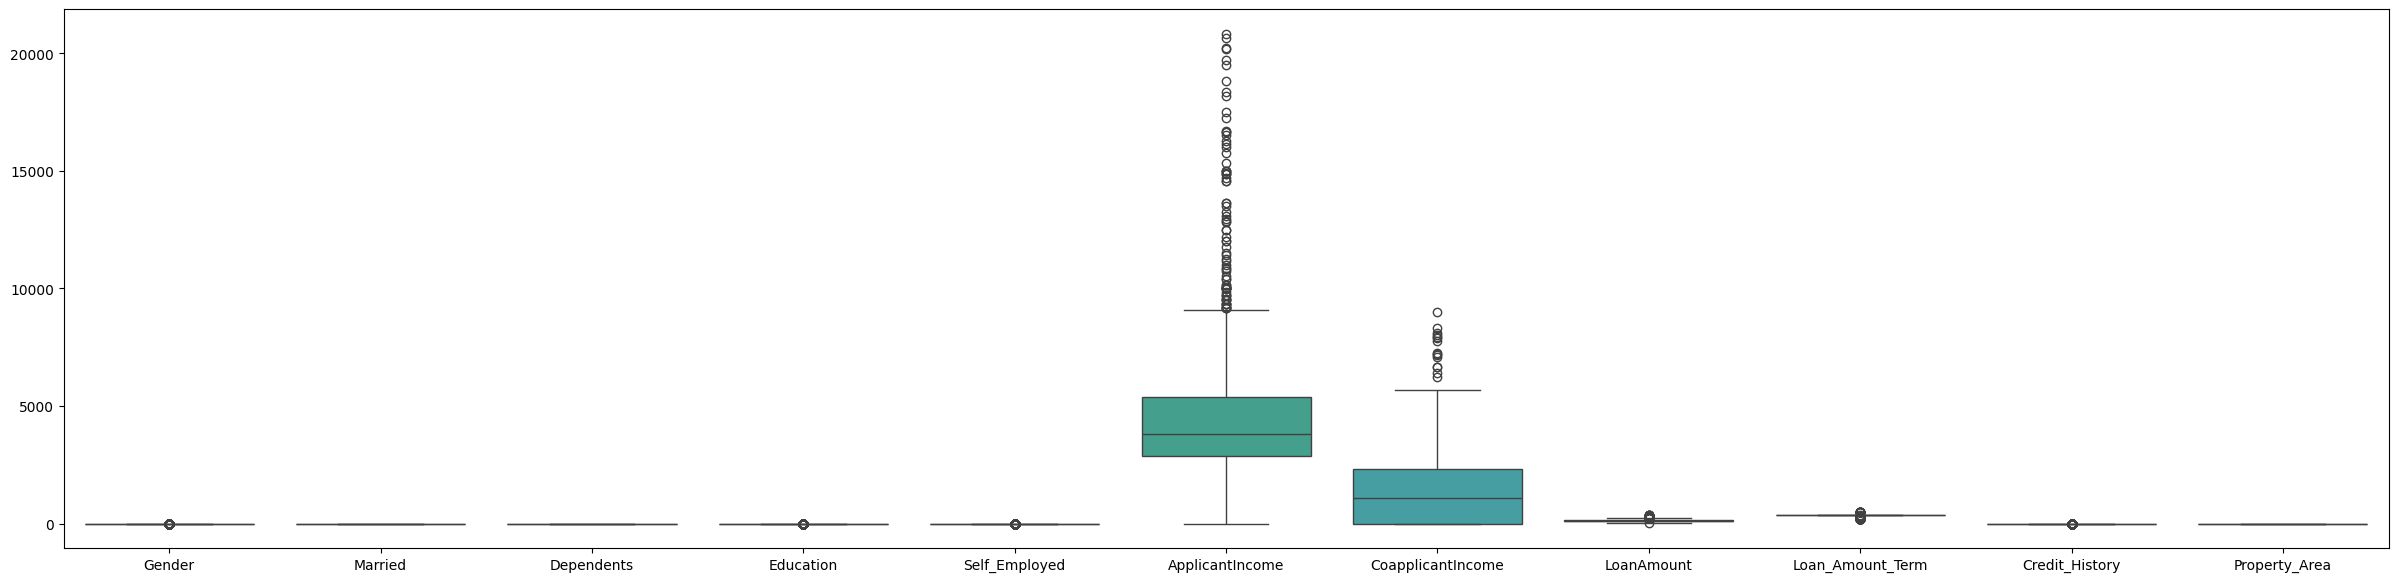

In [312]:
# Checking the Ranges of the predictor variables and dependent variable after outlier treatment
plt.figure(figsize=(30, 7))
sns.boxplot(data)

## Split the Data into X & Y

In [313]:
X=data.iloc[:614,] ## all the data in X (Train set)
y=Loan_status  ## Loan status will be our Y

In [314]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=0)

In [315]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [316]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


### Feature Importance

#### 1) using SelectKBest

In [317]:
from sklearn.feature_selection import SelectKBest, chi2

In [318]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 8)
fit = bestFeatures.fit(train_X,train_y)

In [319]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [320]:
#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Gender,0.003800
1,Married,0.666402
2,Dependents,0.263922
3,Education,1.024204
4,Self_Employed,0.009742
5,ApplicantIncome,9.925817
6,CoapplicantIncome,913.003446
7,LoanAmount,100.887704
8,Loan_Amount_Term,1.170284
9,Credit_History,19.284423


In [321]:
#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

                Specs       Score
6   CoapplicantIncome  913.003446
7          LoanAmount  100.887704
9      Credit_History   19.284423
5     ApplicantIncome    9.925817
8    Loan_Amount_Term    1.170284
3           Education    1.024204
1             Married    0.666402
10      Property_Area    0.439258
2          Dependents    0.263922
4       Self_Employed    0.009742


most important features ranked accordingly

### 2)  Using ExtraTreesClassifier

In [322]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [323]:
print(model.feature_importances_)

[0.02938167 0.02589582 0.07322456 0.02553742 0.03179232 0.20132399
 0.12100825 0.19950296 0.05079445 0.18291449 0.05862406]


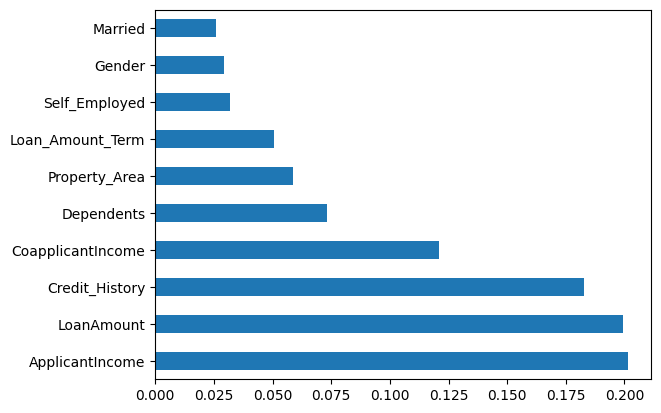

In [324]:
#Plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

## Normalisation

In [325]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_copy = data.copy()
data_copy = scaler.fit_transform(data_copy)

After Normalisation, checking predictor variables

<Axes: >

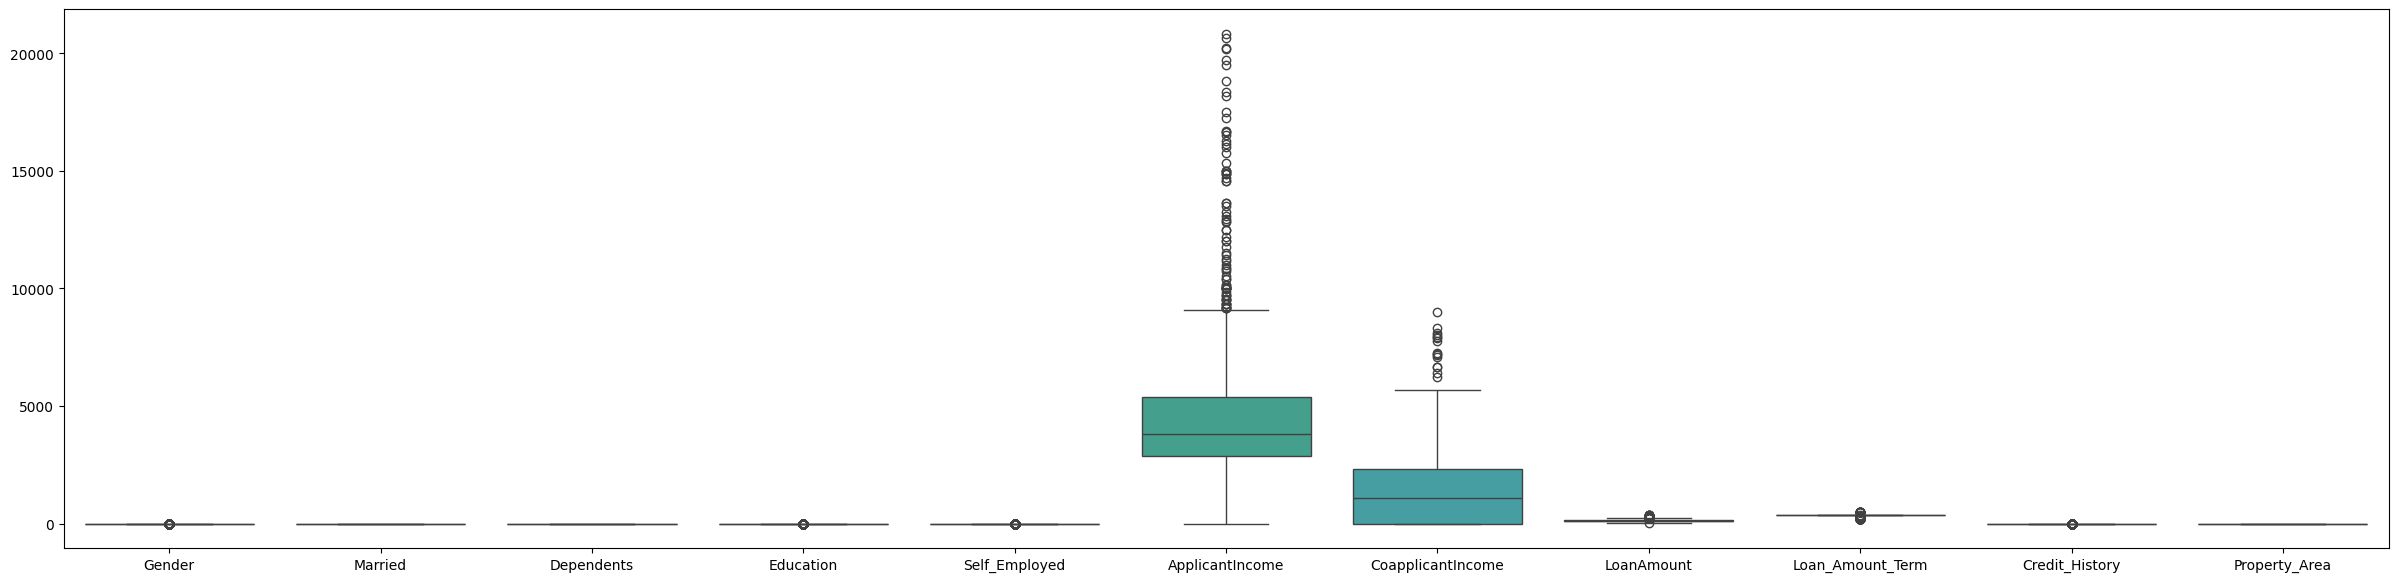

In [326]:
# Checking the Ranges of the predictor variables and dependent variable  Before normalization
plt.figure(figsize=(30, 7))
sns.boxplot(data)

<Axes: >

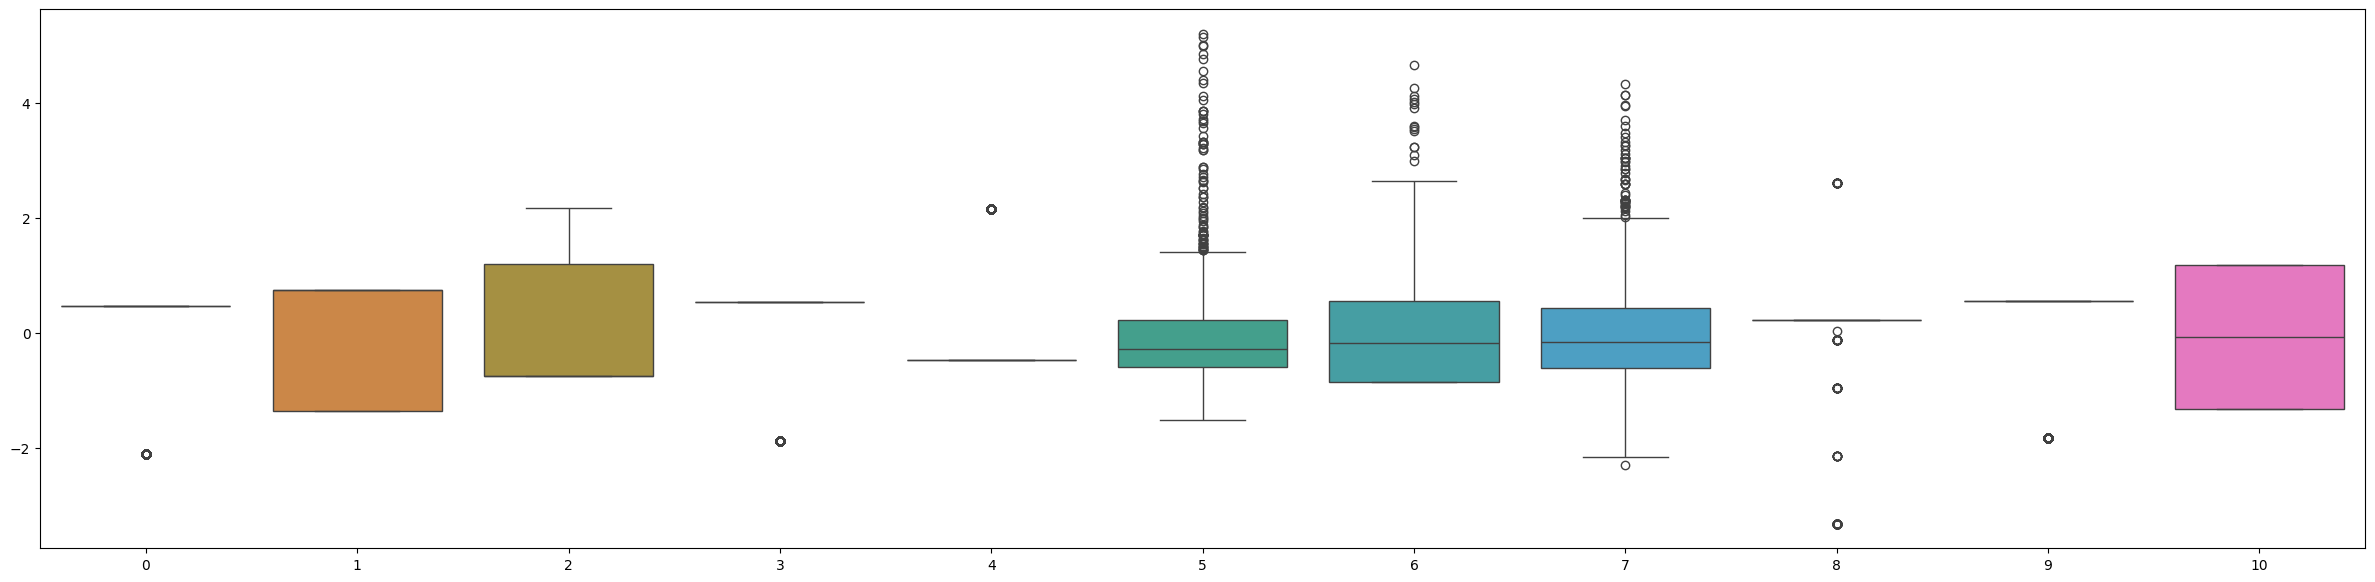

In [327]:
# Checking the Ranges of the predictor variables and dependent variable  after normalization
plt.figure(figsize=(30, 7))
sns.boxplot(data_copy)

**Here  we did normalisation for interpretability of the model by putting features on a common scale. It makes it easier to understand the relative importance and contribution of each feature to the model's predictions.**

## Using Different types of Machine Learning Model

In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Fitting all ML Models

In [329]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [330]:
scoring='accuracy'

In [331]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [332]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0, shuffle=True)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

/Users/sathwik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sathwik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

LogisticRegression()
Logistic Regression 0.747826
DecisionTreeClassifier()
Decision Tree 0.608696
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.763043
RandomForestClassifier()
Random Forest 0.721739
SVC()
Support Vector Classifier 0.676087
KNeighborsClassifier()
K- Neirest Neighbour 0.645652
GaussianNB()
Naive Bayes 0.763043


In [333]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.7922077922077922
[[ 21  22]
 [ 10 101]]
              precision    recall  f1-score   support

           0       0.68      0.49      0.57        43
           1       0.82      0.91      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.78      0.79      0.78       154



/Users/sathwik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


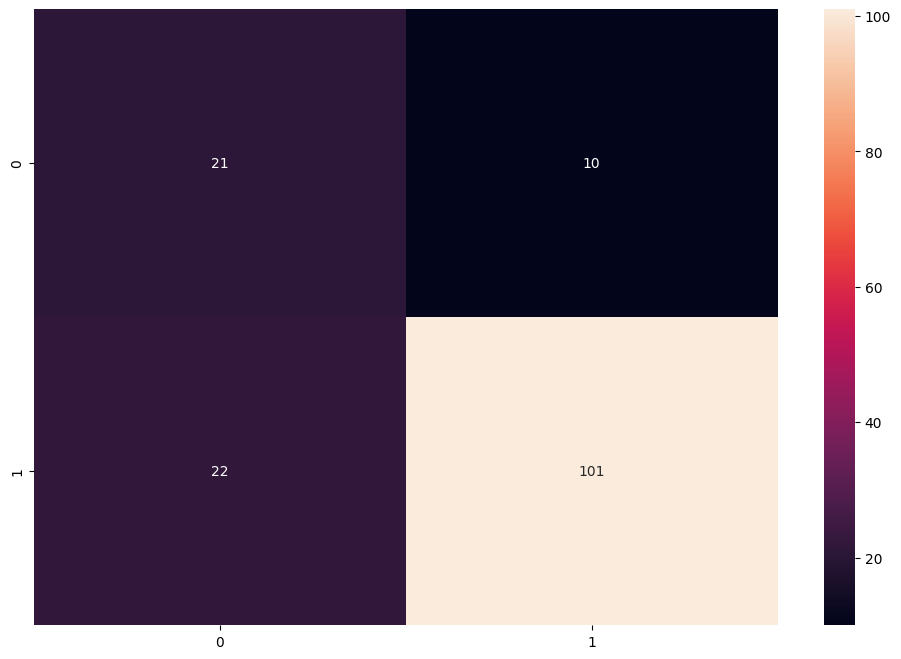

In [334]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12,8))
pred = LR.predict(test_X)
cm = confusion_matrix(pred, test_y)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.show()

In [335]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [336]:
X_test=data.iloc[614:,] 
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [337]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
615,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
616,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
617,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,0.0,2
618,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [338]:
prediction = LR.predict(X_test)

In [339]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1]


In [340]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

/Users/sathwik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [341]:
print(t)

[1]


## SHAP Analysis on Logistic Regression

In [342]:
from sklearn.pipeline import Pipeline
import shap
explainer = shap.Explainer(LR.predict, train_X)
shap_values = explainer(X_test)

In [343]:
shap.initjs()

In [344]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

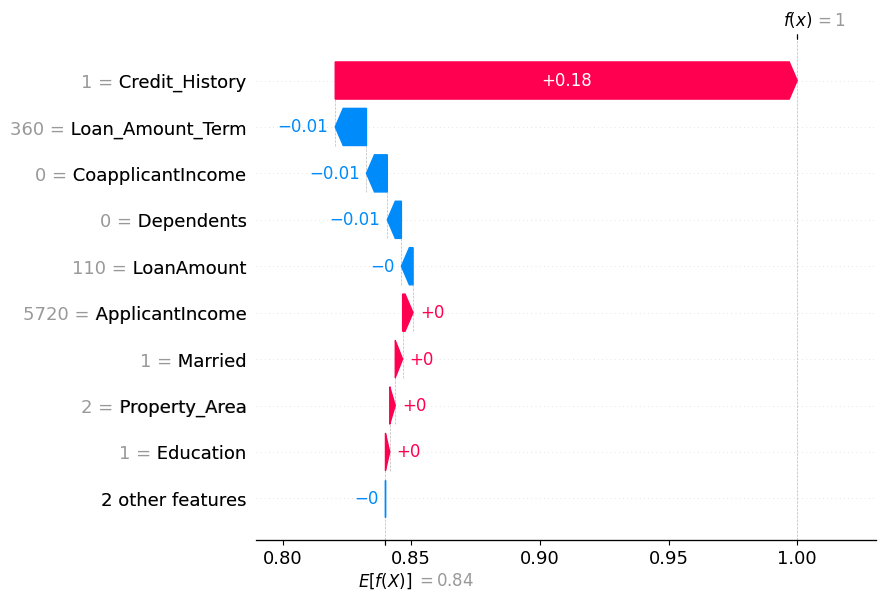

In [345]:
sample_feature_importance(0, 'waterfall')

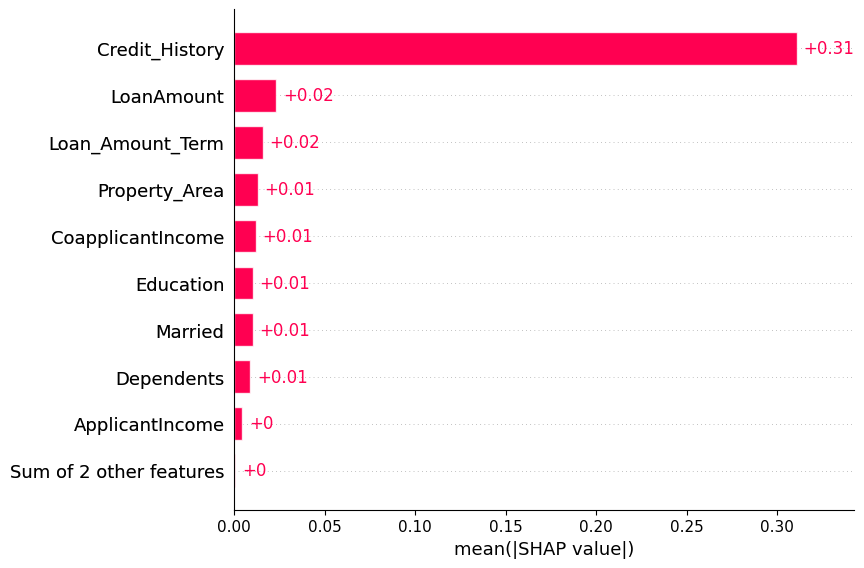

In [346]:
shap.plots.bar(shap_values)

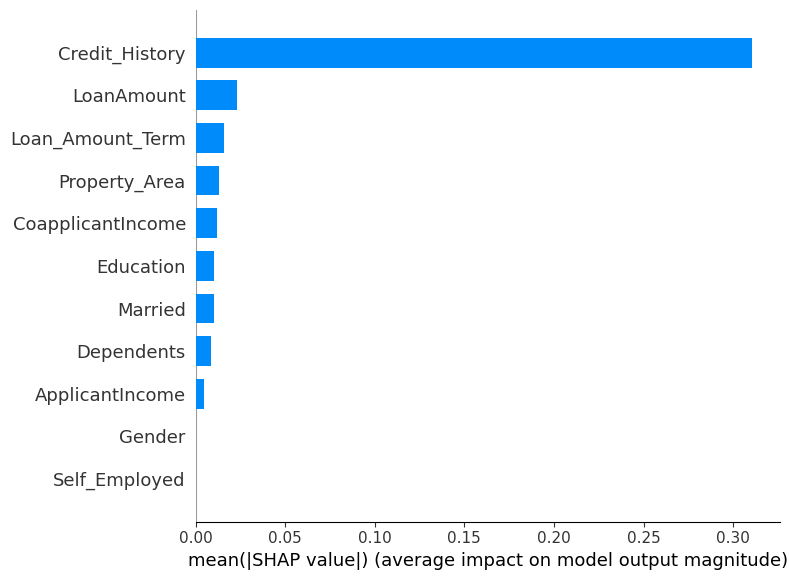

In [347]:
shap.summary_plot(shap_values.values, train_X, plot_type='bar')

## Saving Data in Pickle format

In [348]:
import pickle
# now you can save it to a file
file = './Pickle Saved Data/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(LR, f)

In [349]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [350]:
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1]


/Users/sathwik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## References

AIskunks: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb

How to Identify the Most Important Predictor Variables in Regression Models https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models

https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

## License

MIT License

Copyright (c) 2024 Sathwik Reddy Chelemela

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.